#  Régression mutiple

## Objectif :

Modélisation du prix des voitures, ce modèle sera utilisé par une entreprise pour comprendre comment exatement les prix varient en fonction des variables indépendantes, et comment elle peut manipuler la conception des voitures, la stratégie comerciale ...etc, ainsi que comprendre dynamiquement le prix d'un nouveau marché. 
Pour cela nous avons utilisé la régression multiple qui permet d'expliquer, de manière linéaire,le prix (variable à expliquer),  en fonction des caractéristiques des voitures, en suivant les étapes suivantes:
<ol>
    <b><li>  Netoyage des données  </li></b>
    <b><li>  La Comprehension et Exploration des données. </li> </b>
    <b><li>  Préparation des données.  </li> </b>
   <b><li>   Construction du modèle. </li> </b>
    <b><li>  Evaluation du modèle. </li> </b>
    <b><li> Résumé </li> </b>
    
</ol>

#### importation des librairies

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LassoCV
#gestion d'affichage 
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


#### importation du dataset
Nous commençons par importer notre dataset, et afficher les 5 premières lignes dont il y'a 204 observations et 26 variables.

In [2]:
df = pd.read_csv(r'C:\Users\Zineb\Desktop\Nouveau_projet\dataset.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


# Netoyage des données

#### 1.1 verification des valeurs manquantes
Notre dataset est propre ne contient pas des valeurs manquantes.

In [3]:
df.isnull().any()

car_ID              False
symboling           False
CarName             False
fueltype            False
aspiration          False
doornumber          False
carbody             False
drivewheel          False
enginelocation      False
wheelbase           False
                    ...  
enginesize          False
fuelsystem          False
boreratio           False
stroke              False
compressionratio    False
horsepower          False
peakrpm             False
citympg             False
highwaympg          False
price               False
Length: 26, dtype: bool

#### 1.2  Extraire le modèle des voitures à partir de la variable CarName
Comme il est ennoncé dans le cahier de charge on'a une variable CarName qui se compose de deux parties la première pour le nom de la compagnie la deuxième pour le modèle de la voiture, il est demandé d'éliminer le modèle.

In [4]:
car_names = df.iloc[:,2]
car_names = np.array(list(map(lambda s:s.split(' ')[0],car_names)))
df['CarName'] = car_names
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


#### 1.3 Eliminer la colonne Car_ID

In [5]:
df = df.drop(['car_ID'],axis = 1)

#### 1.4 Modifier le type de la variable symboling
<b>Symboling</b>: une variable catégorique sous forme numérique, contient 6 valeurs possibles qui signifies le risque d’assurance attribuée à une voiture, .<br>
une valeur de +3 indique que l’auto est risquée, -3 qu’elle est moins risquée, donc nous modifions le type de la variable. 

In [6]:
df['symboling'] = df['symboling'].astype('object')

#### 1.5 Examiner les variables catégoriques
Nous remarquons qu'il existe des fautes d'écritures dans la variable <b>CarName</b>,donc nous avons remplacé :
<ul>
<li>vw et vokswagen par volkswagen </li>
    <li>maxda par mazda </li>
    <li>Nissan par nissan</li>
    <li>porcshce par  porsche </li>
    <li>toyouta par toyota</li>


</ul>


In [7]:
df=df.replace(["vw", "maxda", "Nissan", "porcshce", "toyouta","vokswagen"],
           ["volkswagen", "mazda", "nissan", "porsche","toyota","volkswagen"])

# 2. Comprehension et Exploration des données

### 2.1 Etude sur la variable dépendante


{'whiskers': [<matplotlib.lines.Line2D at 0x117893d3c50>,
 'caps': [<matplotlib.lines.Line2D at 0x117893ec320>,
 'boxes': [<matplotlib.lines.Line2D at 0x117893d3828>],
 'medians': [<matplotlib.lines.Line2D at 0x117893ec9b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x117893eccf8>],
 'means': []}

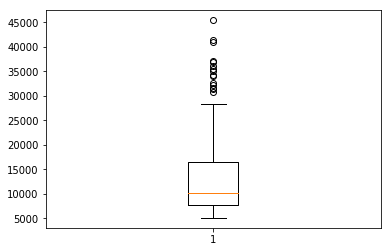

In [8]:
plt.boxplot(df['price'])

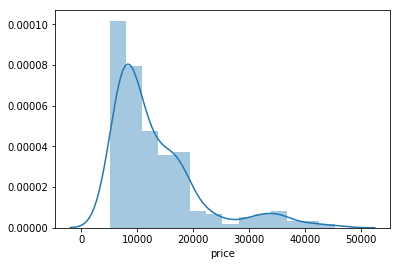

In [9]:
sn.distplot(df['price'])

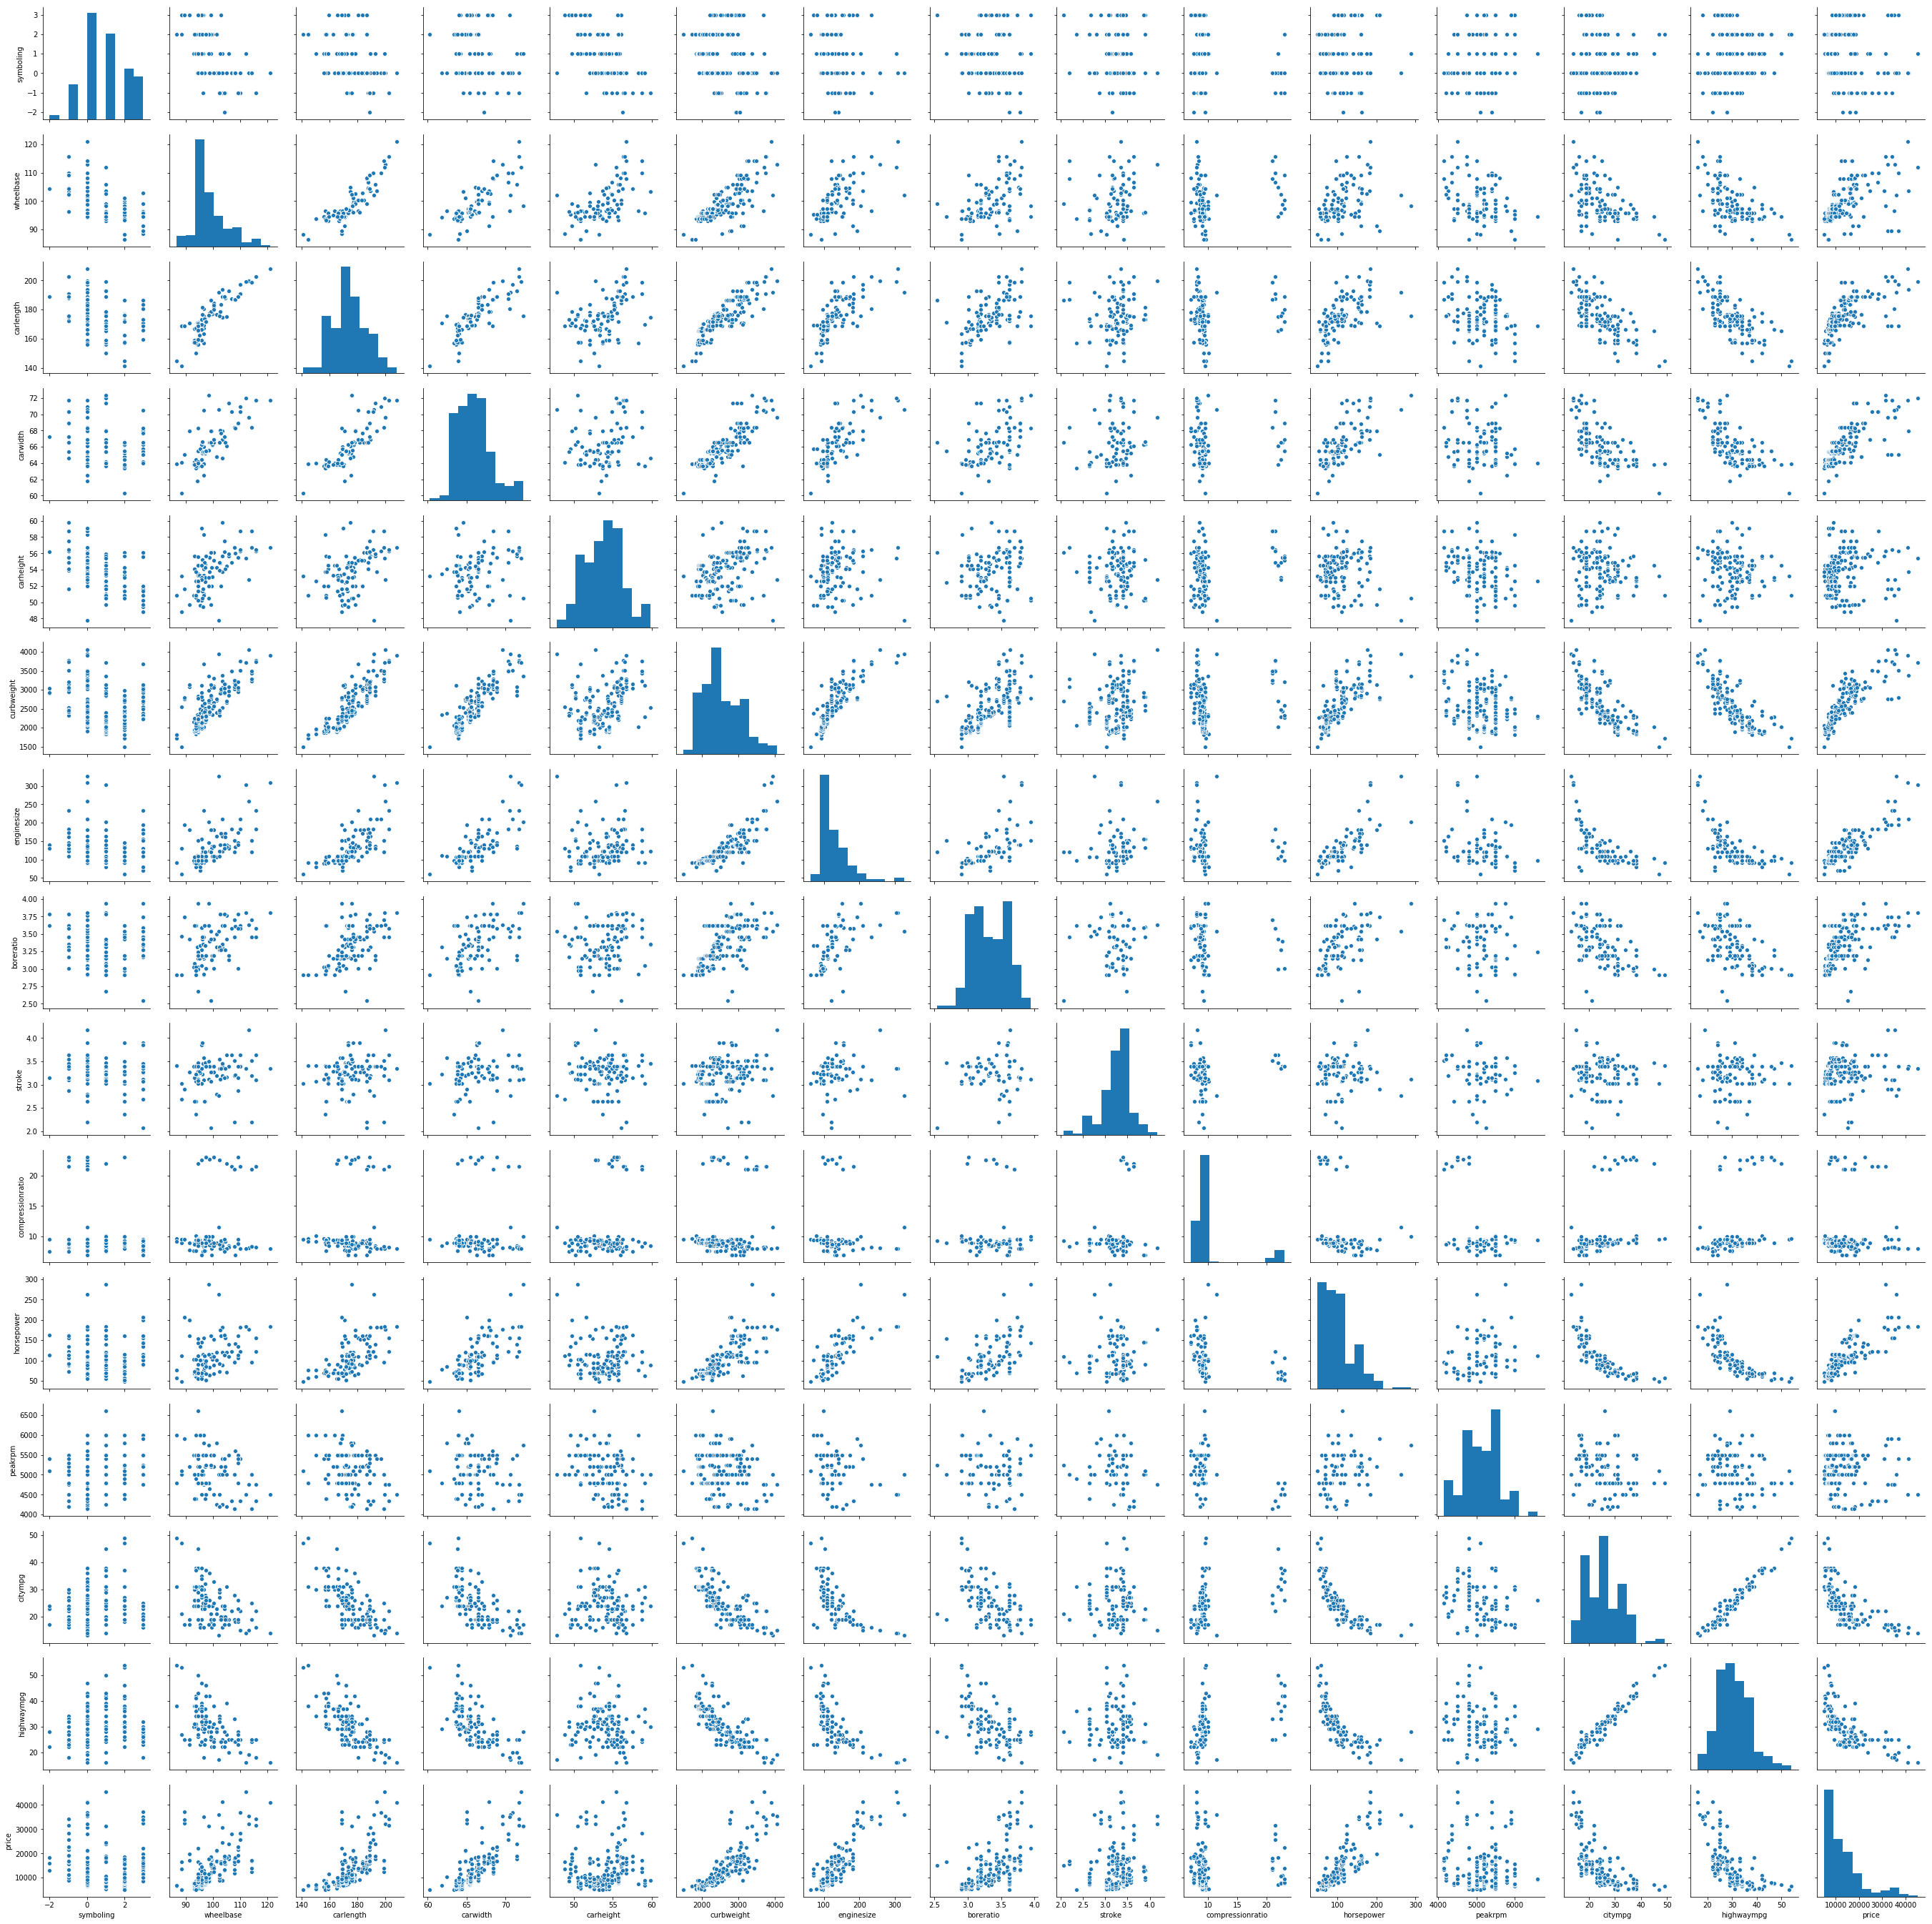

In [10]:
sn.pairplot(df)

Nous remarquons qu'il y'a une relation linéaire entre les variables independantes et le prix 

### 2.2 Etude de corrélation 

la matrice de corrélation permet de visualiser la multicolinearité entre les variables numériques de notre dataset, les variables qui ont un coeficient de corrélation proche de 1 ou -1, sont des variable positivement/négativement corrélées entre eux, dans notre cas nous remarquons qu'il y'a une corrélation positive entre  la variable <b> price  </b> et  <b> wheelbase </b> et <b>carlength</b>, <b>carwidth</b>, <b>curbweight</b>, <b>enginesize</b>, <b>horsepower</b>, et il y'a une correlation négative entre la variable <b>price</b> et <b> citympg </b>, <b> highwaympg</b>.

Donc conservons que ces variables corrélés avec le prix, mais il faut vérifié qu'il n'existe pas une forte corrélation entre ces variables.<br>
Nous remarquons qu'il y'a une forte corrélation entre :
<ul>
    <li><b>wheelbase</b> et <b> carlength </b>,<b> carwidth</b>,<b>curbweight</b> .</li>
    <li><b>curbweight</b> et<b> enginesize </b>, <b> carwidth </b>,<b>carlength</b>,<b>wheelbase</b>.</li>
    <li><b>enginesize</b> et<b>horsepower </b>,<b>curbweight</b>.</li>
    <li><b>citympg</b> et <b> hightwaympg </b>.</li>
</ul>


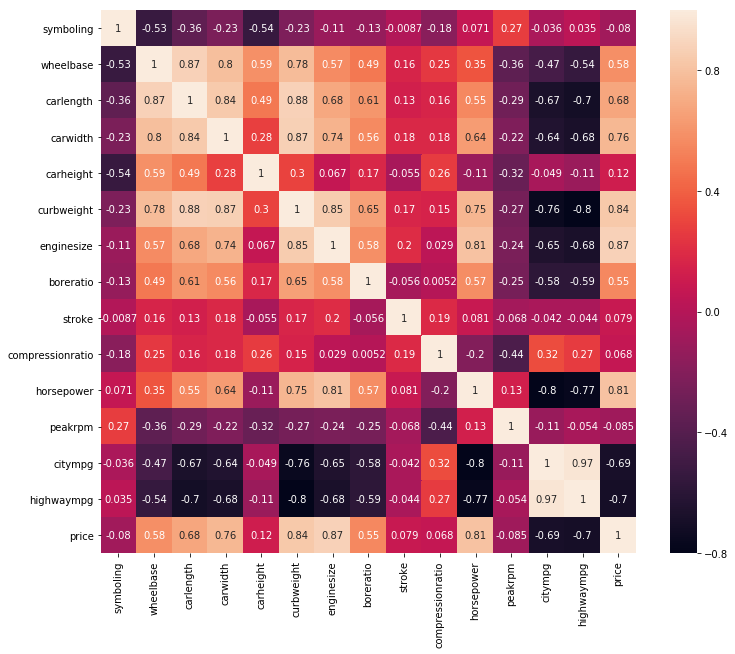

In [11]:
plt.figure (figsize = (12,10)) 
sn.heatmap(df.corr(),annot=True)
plt.show()

### 2.3 Etude sur les variables catégoriques

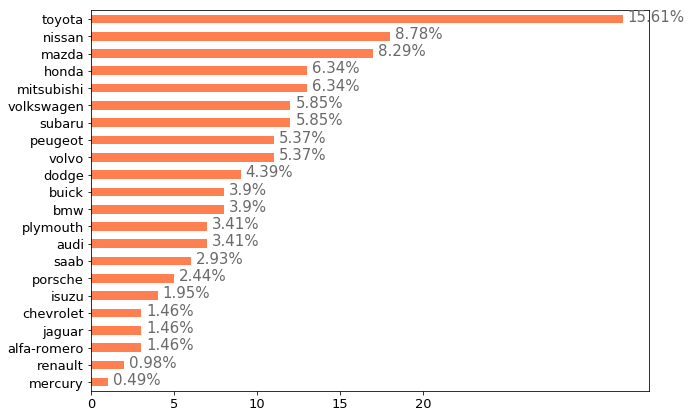

In [12]:
ax = df['CarName'].value_counts().plot(kind='barh', figsize=(10,7),color="coral", fontsize=13)

ax.set_alpha(0.8)
ax.set_xticks([0, 5, 10, 15, 20])
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.3, i.get_y()+.38, \
            str(round((i.get_width()/total)*100, 2))+'%', fontsize=15,color='dimgrey')

# invert for largest on top 
ax.invert_yaxis()

Nous remarquons que :<br>
<ul>
<li><b>Toyota</b> détient clairement un pourcentage de marché dominant de 15,6% <li>
suivi de
<li><b>Nissan</b> avec 8,78%</li>
<li><b>Mazda </b> avec 8,29%</li>
<li><b>Mitsubishi</b> et Honda sont également populaires avec un pourcentage de marché de 6,34%.</li>

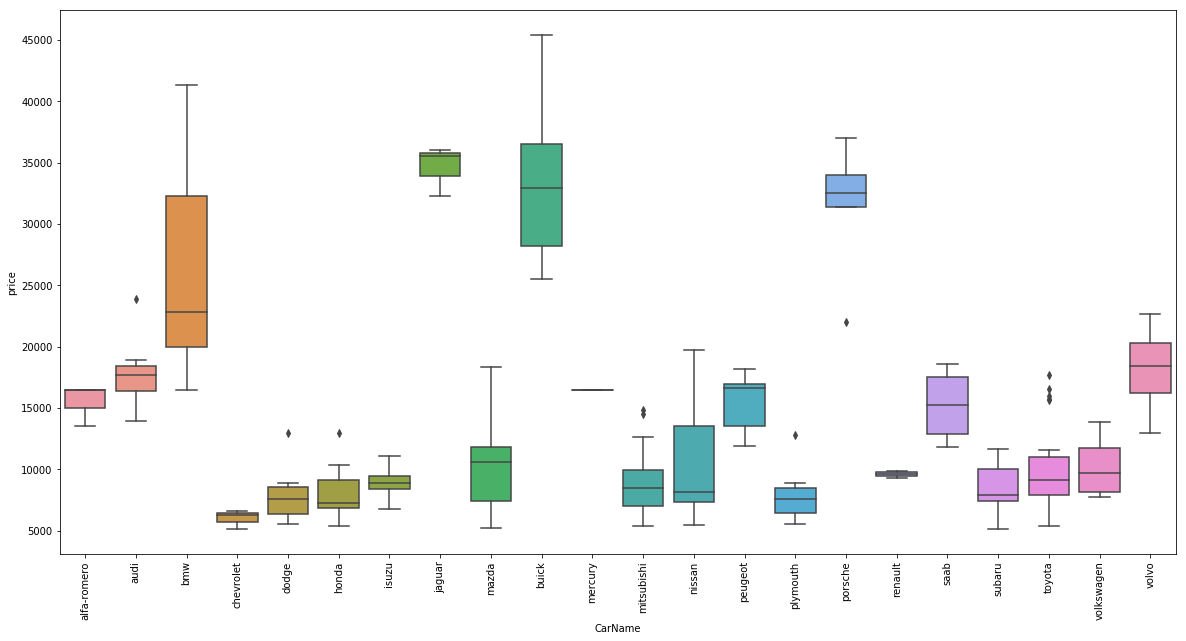

Prix moyen des voitures : 13276.710570731706
CarName
jaguar     34600.000000
buick      33647.000000
porsche    31400.500000
bmw        26118.750000
volvo      18063.181818
Name: price, dtype: float64


In [13]:
plt.figure(figsize=(20,10))
sn.boxplot(x ='CarName', y = 'price', data = df)
plt.xticks(rotation=90)
plt.show()
print('Prix moyen des voitures :',df['price'].mean())
print(df.groupby('CarName').price.mean().sort_values(ascending=False).head())


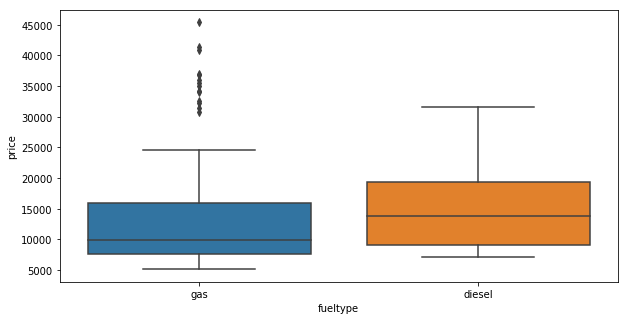

Prix moyen des voitures : 13276.710570731706
fueltype
diesel    15838.1500
gas       12999.7982
Name: price, dtype: float64


In [14]:
plt.figure(figsize=(10,5))
sn.boxplot(x='fueltype', y='price', data=df)
plt.show()
print('Prix moyen des voitures :',df['price'].mean())
print(df.groupby('fueltype').price.mean().sort_values(ascending=False).head())


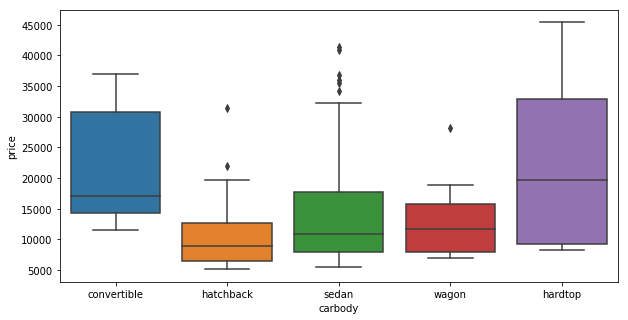

carbody
hardtop        22208.500000
convertible    21890.500000
sedan          14344.270833
wagon          12371.960000
hatchback      10376.652386
Name: price, dtype: float64


In [15]:
plt.figure(figsize=(10,5))
sn.boxplot(x='carbody', y='price', data=df)
plt.show()
print(df.groupby('carbody').price.mean().sort_values(ascending=False).head())


Les voitures qui ont une architecture <b> hardtop</b> et <b>convertibles</b> ont un prix nettement plus élevé que les autres types disponibles. Nous diduisons que la variable <b>carbody</b>  contribue à déterminer le prix.

# 3.Préparation des données

### 3.1 Eliminer les variables Catégoriques

Nous éliminons les variables catégoriques par la foction <b>get_dummies</b> de la librairie pandas qui consiste à convertir chaque valeur  d'une variable  catégorique  en une nouvelle colonne et à lui attribuer une valeur 1 ou 0 (Vrai / Faux), <br>
Nous utilisons <b>drop_first</b> pour supprimer une  variables factice afin d'éviter la multicolinéarité (dépendance entre les variables.) et la redondance des informations.

Par exemple : la variable <b> drivewheel </b> où nous avons les valeurs de <font color = 'red'> 4wd,fwd ou rwd</font> En utilisant, get_dummies nous pouvons convertir ceci en 2 colonnes avec un 1 ou un 0 correspondant à la valeur correcte.


In [16]:
df=pd.get_dummies(df, drop_first=True)
df

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarName_audi,CarName_bmw,CarName_buick,CarName_chevrolet,CarName_dodge,CarName_honda,CarName_isuzu,CarName_jaguar,CarName_mazda,CarName_mercury,CarName_mitsubishi,CarName_nissan,CarName_peugeot,CarName_plymouth,CarName_porsche,CarName_renault,CarName_saab,CarName_subaru,CarName_toyota,CarName_volkswagen,CarName_volvo,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
5,2,99.8,177.3,66.3,53.1,2507,136,3.19,3.40,8.5,110,5500,19,25,15250.000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
6,1,105.8,192.7,71.4,55.7,2844,136,3.19,3.40,8.5,110,5500,19,25,17710.000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
7,1,105.8,192.7,71.4,55.7,2954,136,3.19,3.40,8.5,110,5500,19,25,18920.000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
8,1,105.8,192.7,71.4,55.9,3086,131,3.13,3.40,8.3,140,5500,17,20,23875.000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
9,0,99.5,178.2,67.9,52.0,3053,131,3.13,3.40,7.0,160,5500,16,22,17859.167,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


### 3.3 Division du dataset

Nous divisons notre dataset en deux parties, 70 % d'apprentissage  et  30 % pour le test.

In [17]:
dftrain, dftest = train_test_split(df, test_size =0.3, random_state = 0) 
   
print("dftrain shape : ", dftrain.shape) 
print("dftest shape  : ", dftest.shape) 


dftrain shape :  (143, 65)
dftest shape  :  (62, 65)


### 3.4  Mettre les variables sur le meme échelle


In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

x_vars = ['symboling','wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price']

dftrain[x_vars] = scaler.fit_transform(dftrain[x_vars])
dftest[x_vars] = scaler.fit_transform(dftest[x_vars])

dftest

C:\Users\Zineb\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\Zineb\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarName_audi,CarName_bmw,CarName_buick,CarName_chevrolet,CarName_dodge,CarName_honda,CarName_isuzu,CarName_jaguar,CarName_mazda,CarName_mercury,CarName_mitsubishi,CarName_nissan,CarName_peugeot,CarName_plymouth,CarName_porsche,CarName_renault,CarName_saab,CarName_subaru,CarName_toyota,CarName_volkswagen,CarName_volvo,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
52,0.6,0.224138,0.292683,0.325000,0.484536,0.185169,0.123457,0.350000,0.590164,0.127389,0.083333,0.444444,0.485714,0.578947,0.041631,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
181,0.2,0.617241,0.759350,0.516667,0.484536,0.738455,0.411523,0.521429,0.699454,0.140127,0.450000,0.555556,0.142857,0.210526,0.263939,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
5,0.8,0.455172,0.588618,0.500000,0.381443,0.452487,0.308642,0.464286,0.726776,0.095541,0.258333,0.722222,0.142857,0.236842,0.251527,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
18,0.8,0.062069,0.000000,0.000000,0.391753,0.000000,0.000000,0.264286,0.524590,0.159236,0.000000,0.500000,0.942857,0.973684,0.000819,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
188,0.8,0.368966,0.497561,0.433333,0.649485,0.360568,0.197531,0.464286,0.726776,0.191083,0.216667,0.722222,0.342857,0.421053,0.121071,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
170,0.8,0.406897,0.570732,0.441667,0.268041,0.528863,0.349794,0.771429,0.781421,0.146497,0.283333,0.333333,0.285714,0.368421,0.150961,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
76,0.8,0.244828,0.263415,0.341667,0.144330,0.190941,0.127572,0.307143,0.633880,0.152866,0.083333,0.722222,0.657143,0.657895,0.006728,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
154,0.4,0.313793,0.465041,0.275000,1.000000,0.356128,0.127572,0.364286,0.524590,0.127389,0.058333,0.333333,0.371429,0.421053,0.069013,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
104,1.0,0.162069,0.481301,0.633333,0.030928,0.702931,0.493827,0.635714,0.655738,0.127389,0.466667,0.555556,0.142857,0.236842,0.299911,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
33,0.6,0.244828,0.144715,0.308333,0.329897,0.200710,0.127572,0.264286,0.732240,0.140127,0.116667,1.000000,0.457143,0.473684,0.035028,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [19]:
dftrain .describe ()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarName_audi,CarName_bmw,CarName_buick,CarName_chevrolet,CarName_dodge,CarName_honda,CarName_isuzu,CarName_jaguar,CarName_mazda,CarName_mercury,CarName_mitsubishi,CarName_nissan,CarName_peugeot,CarName_plymouth,CarName_porsche,CarName_renault,CarName_saab,CarName_subaru,CarName_toyota,CarName_volkswagen,CarName_volvo,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.0,143.000000,143.000000,143.000000,143.000000,143.000000,143.0,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.0,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.0,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.542657,0.361475,0.470943,0.412376,0.501573,0.337865,0.225907,0.590972,0.414210,0.213033,0.247686,0.394748,0.480839,0.465824,0.226609,0.020979,0.041958,0.041958,0.013986,0.041958,0.069930,0.013986,0.020979,0.083916,0.0,0.069930,0.090909,0.062937,0.041958,0.020979,0.0,0.020979,0.055944,0.146853,0.048951,0.069930,0.881119,0.202797,0.391608,0.041958,0.307692,0.489510,0.125874,0.573427,0.391608,0.020979,0.0,0.062937,0.713287,0.076923,0.062937,0.020979,0.048951,0.783217,0.125874,0.0,0.006993,0.020979,0.335664,0.013986,0.118881,0.006993,0.412587,0.048951,0.006993
std,0.250771,0.182477,0.189797,0.208494,0.210479,0.235360,0.164877,0.237086,0.188028,0.270256,0.181386,0.207927,0.240163,0.206042,0.221668,0.143818,0.201198,0.201198,0.117845,0.201198,0.255926,0.117845,0.143818,0.278236,0.0,0.255926,0.288490,0.243703,0.201198,0.143818,0.0,0.143818,0.230621,0.355204,0.216524,0.255926,0.324786,0.403496,0.489826,0.201198,0.463161,0.501647,0.332873,0.496318,0.489826,0.143818,0.0,0.243703,0.453816,0.267406,0.243703,0.143818,0.216524,0.413502,0.332873,0.0,0.083624,0.143818,0.473882,0.117845,0.324786,0.083624,0.494030,0.216524,0.083624
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,0.230321,0.353543,0.232323,0.350000,0.165332,0.107422,0.419643,0.333333,0.100000,0.100000,0.265306,0.280000,0.290323,0.072319,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.400000,0.300292,0.450394,0.363636,0.525000,0.264798,0.195312,0.58

### 3.5 Definir la variable dépendante Y et les variables indépendantes X pour la construction du modèle

In [20]:
ytrain  = dftrain.pop('price') 
xtrain  =  dftrain

# Construction du modèle
 
 Nous avons utilisé l'approche RFE (Recursive Feature Elimination ) qui permet de sellectionner la meilleurs ensemble de données pour construire un bon modèle.

### RFE  

In [21]:
model  =  LinearRegression () 
model . fit ( xtrain ,  ytrain )
# selectionner les 12 variables les plus significatives, qui ont un impact sur le prix 
rfe  =  RFE (model , 12)              
rfe  =  rfe . fit ( xtrain ,  ytrain )
col  =  xtrain.columns[ rfe . support_ ] 
col

Index(['carwidth', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'peakrpm', 'CarName_bmw', 'CarName_buick', 'CarName_porsche', 'enginelocation_rear', 'enginetype_ohcv', 'cylindernumber_two'], dtype='object')

In [22]:
xtrain = xtrain[col]

Dans cet étape nous appliquons la methode ols de la regression  (des moindres carrées), pour construire notre modèle avec une précision choisie de  0.05, vérifiant à chaque fois que les variables utilisées sont non corrélées  

In [23]:
import statsmodels.api as sm
lm1  =  sm.OLS ( ytrain , xtrain ).fit ()  
print ( lm1 . summary ()) 

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     421.5
Date:                Wed, 26 Jun 2019   Prob (F-statistic):           4.76e-97
Time:                        17:50:14   Log-Likelihood:                 218.10
No. Observations:                 143   AIC:                            -414.2
Df Residuals:                     132   BIC:                            -381.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
carwidth                0.1847    

toutes les variables ont un pvalue < 0.05, et Rsquared = 0.972 

Nous avons pour toutes les variables pvalue = 0, passant maintenant à verifier la multicolinearité par VIF,entre les variables restantes.

In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def getVIF(X_train):
    #X_train = df.drop(['const'], axis=1)
    # Calculate the VIFs for the new model
    vif = pd.DataFrame()
    X = X_train
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [25]:
getVIF(xtrain)

,Features,VIF
8,CarName_porsche,inf
9,enginelocation_rear,inf
1,curbweight,22.97
0,carwidth,21.61
2,enginesize,21.32
3,boreratio,11.11
4,stroke,6.70
5,peakrpm,4.54
10,enginetype_ohcv,2.30
7,CarName_buick,1.51


Nous avons les variables <b>CarName_porsche</b>  et <b>enginelocation_rear</b> ont  une valeur VIF infinie 

In [26]:

xtrain = xtrain.drop(['CarName_porsche'],axis=1)
xtrain = xtrain.drop(['enginelocation_rear'],axis=1)


In [27]:
lm2  =  sm.OLS ( ytrain , xtrain ).fit ()  
print ( lm2 . summary ())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     260.8
Date:                Wed, 26 Jun 2019   Prob (F-statistic):           3.18e-82
Time:                        17:50:14   Log-Likelihood:                 177.97
No. Observations:                 143   AIC:                            -335.9
Df Residuals:                     133   BIC:                            -306.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
carwidth               0.0807      0

Nous remarquons que la variable <b> carbody_hardtop </b> a une pvalue > 0.05, donc nous éliminons cette variable 

In [28]:
xtrain = xtrain.drop(['carwidth'],axis=1)

In [29]:
lm3  =  sm.OLS ( ytrain , xtrain ).fit ()  
print ( lm3 . summary ())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     287.8
Date:                Wed, 26 Jun 2019   Prob (F-statistic):           4.56e-83
Time:                        17:50:14   Log-Likelihood:                 176.98
No. Observations:                 143   AIC:                            -336.0
Df Residuals:                     134   BIC:                            -309.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
curbweight             0.3328      0

In [30]:
getVIF(xtrain)

,Features,VIF
1,enginesize,16.16
0,curbweight,15.45
2,boreratio,9.76
3,stroke,5.17
4,peakrpm,4.00
7,enginetype_ohcv,1.96
6,CarName_buick,1.40
8,cylindernumber_two,1.22
5,CarName_bmw,1.17


In [31]:
xtrain = xtrain.drop(['enginesize'],axis=1)

In [32]:
lm4  =  sm.OLS ( ytrain , xtrain ).fit ()  
print ( lm4 . summary ())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     142.5
Date:                Wed, 26 Jun 2019   Prob (F-statistic):           6.12e-62
Time:                        17:50:15   Log-Likelihood:                 122.15
No. Observations:                 143   AIC:                            -228.3
Df Residuals:                     135   BIC:                            -204.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
curbweight             0.7691      0

In [38]:
xtrain = xtrain.drop(['cylindernumber_two' ],axis=1)

In [39]:
lm5 =  sm.OLS ( ytrain , xtrain ).fit ()  
print ( lm5 . summary ())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     229.4
Date:                Wed, 26 Jun 2019   Prob (F-statistic):           5.17e-65
Time:                        17:52:21   Log-Likelihood:                 121.15
No. Observations:                 143   AIC:                            -232.3
Df Residuals:                     138   BIC:                            -217.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
curbweight        0.7025      0.041     17.086

In [40]:
getVIF(xtrain)

,Features,VIF
1,stroke,4.58
0,curbweight,3.67
2,peakrpm,2.81
4,CarName_buick,1.34
3,CarName_bmw,1.09


Nous avons un <b> R square </b> égale à  0.893 ce qui signifie que  89.3% de variation expliquées par  les variables indépendantes. 

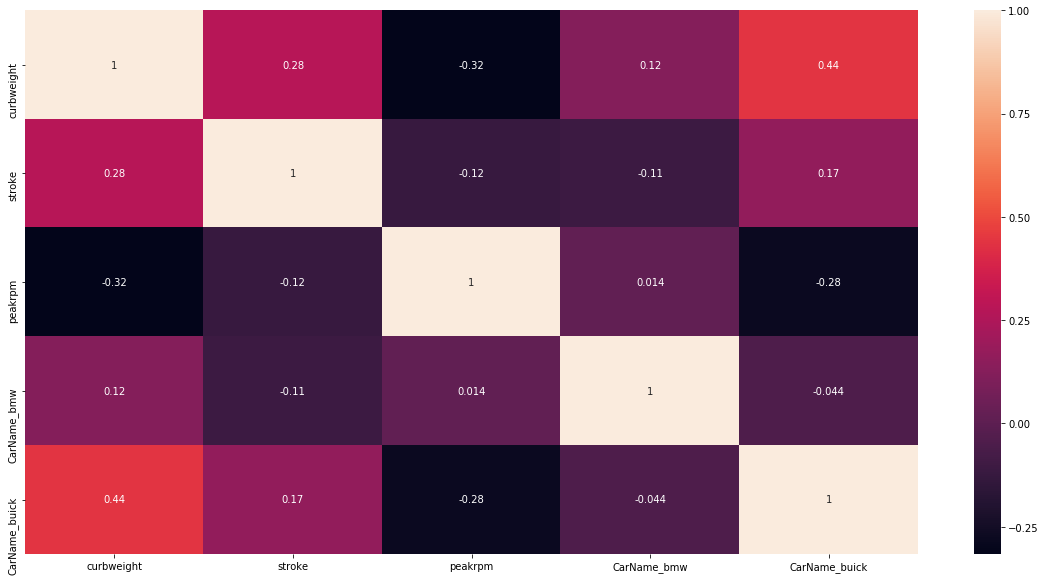

In [41]:
plt.figure ( figsize  =  ( 20 , 10 ))   
sn.heatmap ( xtrain.corr (), annot  =  True )

## Analyse résiduelle
Nous vérifions si les prix sont normalement distribuées 

In [42]:
ypred = lm5.predict(xtrain)

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

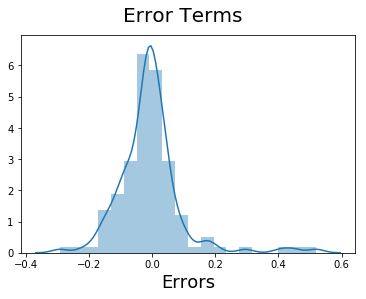

In [44]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((ytrain - ypred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)

la distribution normale parfaite et centré parfaitement autour de zéro avec une existance de certaine variance d'erreur le long de la queue qu'on peut l'ignorer.

## Prédiction


### Division en X_test et y_test 

In [45]:
ytest  =  dftest.pop ( 'price' ) 
xtest  =  dftest[xtrain.columns]


In [47]:
ypred = lm5.predict(xtest)

## Evaluation du modèle 

Text(0, 0.5, 'y_pred')

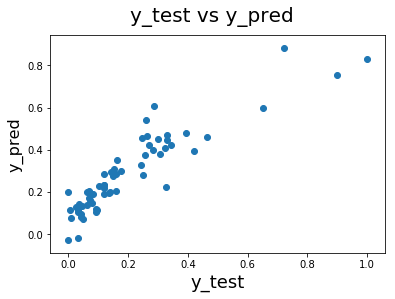

In [49]:
ypred = lm5.predict(xtest)

fig = plt.figure()
plt.scatter(ytest,ypred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16) 

nous remarquons que la relation entre y_pred et y_test est presque lineaire avec quelque variation.

In [50]:
from sklearn.metrics  import  mean_squared_error 
from  math  import  sqrt 
RMSE  =  sqrt ( mean_squared_error ( ytest ,  ypred )) 
print ( 'RMSE du modèle:' , RMSE )  

from sklearn.metrics import r2_score
r2 = r2_score ( ytest ,  ypred ) 
print ( 'Modèle r2_score : ' , r2 )

RMSE du modèle: 0.12131198243159351
Modèle r2_score :  0.6383906278197874


Nous avons un RMSE = 0.12 et r2_score plus élevé de 0.63

### Résumé 

Nous avons déduit un modèle qui explique 89.3% le prix,avec un 'ajustement absolu du modèle environ 88.9 % ce qui est acceptable.
Donc les prédicteurs qui explique bien le prix sont :
<ul>
         <li>stroke	</li>
    	<li>curbweight </li>
    	<li>peakrpm</li>
    	<li>CarName_buick	</li>
    	<li>CarName_bmw</li>
</ul>
